In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report


from tensorflow import keras
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# BUSINESS CASE

#### - Image Recognition and Classification:

The project falls within the domain of computer vision, specifially focusing on the task of image recognition and classification

The specific problem is recognizing and classifying handwritten digits(0-9) from images

#### Goals:

Our goal is to create a robust,high-accuracy model that can serve as reliable tool for recognizing handwritten digits

This project will also help us understand how different models work for this task and provide practical solutions for digit recognition

# DOMAIN ANALYSIS

The MNIST dataset consists of 70,000 28*28 pixel grayscale images, each representing a single handwritten digit

The dataset is labeled, meaning each image is associated with a digit(0-9), providing a supervised learning problem

###### Input : 

28*28 grayscale images of handwritten digits

###### Output :

An integer label from 0 to 9 corresponding to the digit in the image

# BASIC CHECKS

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# EDA

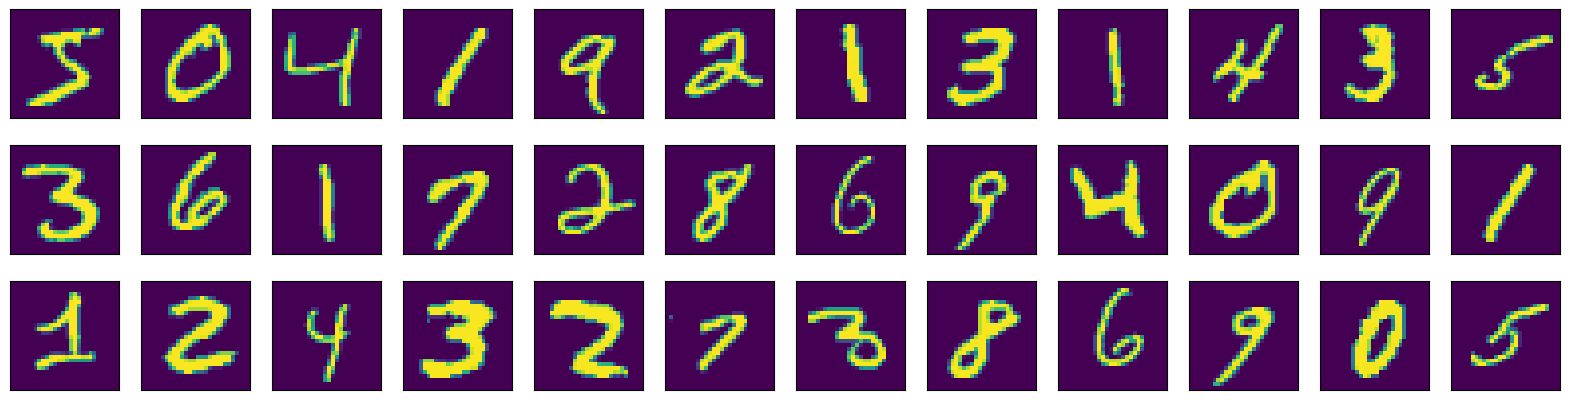

In [8]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

- The graph showcases a diverse range of handwritten digits (0-9) from the MNIST dataset, highlighting the complexity of the image classification task.
- The images display variability in handwriting styles, sizes, and orientations, making classification more challenging.
- The consistent image size and formatting indicate a well-curated dataset, ready for training machine learning models.

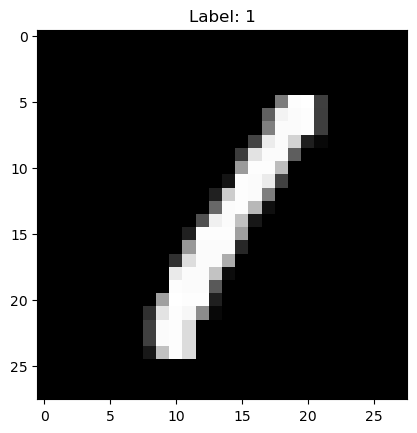

In [9]:
plt.imshow(x_train[3], cmap='gray')
plt.title(f"Label: {y_train[3]}")
plt.show()

- This image represents a single handwritten digit (label: {y_train[3]}) from the MNIST dataset, showcasing the variability in handwriting styles.

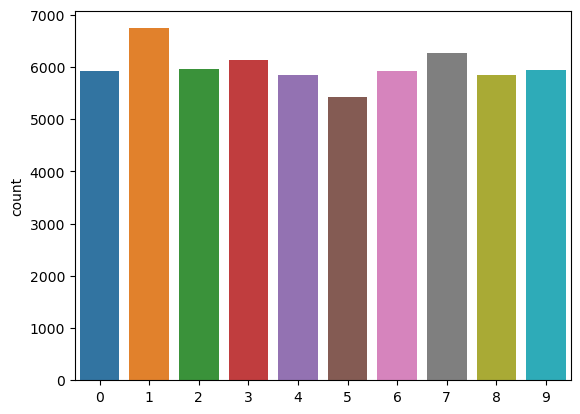

In [10]:
sns.countplot(x = y_train)
plt.show()

- The countplot displays a balanced distribution of digit labels (0-9) in the training dataset.
- Each digit label has a similar frequency, indicating no class imbalance issues.
- This balance is ideal for training machine learning models, ensuring equal representation of all classes.

# Data Preprocessing

# Flattening

###### For Machine learning models like SVM,KNN , flatten the images into 1D vectors

In [11]:
x_train_flat= x_train.reshape(x_train.shape[0],28*28)

In [12]:
x_test_flat = x_test.reshape(x_test.shape[0],28*28)

reshape flattens the 3D array into 1D array

# Normalize the Data

scale pixel values to the range[0,1] to help with model convergence

In [13]:
x_train_normalized= x_train_flat.astype('float32')/255.0

In [14]:
x_test_normalized = x_test_flat.astype('float32')/255.0

converts the data type to 32 bit floating point numbers. 255.0 scales the pixel values from [0,255] to [0,1] which is common normalization technique for image data

# Reshaping for CNN

In [15]:
x_train_cnn = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/ 255.0

In [16]:
x_test_cnn = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/ 255.0

This reshapes the original 3D array into 4D array

#### Handling with nullvalues and outliers

- This dataset is clean, with no missing values or significant outliers, so no special handling is required for this dataset

#### Scaling

- scaling is already handled by the normalization step

#### Balancing

- y_train contains the target labels (the actual digit classes), which is what we are interested in to check if the dataset is balanced

- x_train contains the image data, which doesn’t have class information. Each image corresponds to one label in y_train, so if y_train is balanced, x_train will be balanced as well by association.

In [17]:
from collections import Counter

In [18]:
Counter(y_train)

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

- Although the number of samples for each digit class varies slightly, the differences are not significant enough to cause concern for class imbalance in the MNIST dataset. Thus, SMOTE or other balancing techniques aren't required.

# MODEL CREATION

###### Splitting data into Training and Validation sets

When working with unstructured data, it's often recommended to have a separate validation set.This is because:

- Unstructured data can be noisy or have varying quality
- Models can easily overfit to the training data
- Hyperparameter tuning can be more sensitive to the data distribution

In [19]:
x_train_norm,x_val_norm,y_train_norm,y_val_norm = train_test_split(x_train_normalized,y_train,test_size = 0.2,random_state = 42)

In [20]:
x_train_cnn,x_val_cnn,y_train_cnn,y_val_cnn = train_test_split(x_train_cnn,y_train,test_size = 0.2,random_state=42)

In [21]:
x_train_norm.shape, x_val_norm.shape,y_train_norm.shape,y_val_norm.shape

((48000, 784), (12000, 784), (48000,), (12000,))

# SVM

In [22]:
from sklearn.svm import SVC
svm = SVC(decision_function_shape='ovr')

In [23]:
svm.fit(x_train_norm,y_train_norm)

SVC()

###### Prediction

In [24]:
svm_y_train = svm.predict(x_train_norm)
svm_y_train

array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)

In [25]:
svm_y_val = svm.predict(x_val_norm)
svm_y_val

array([7, 3, 8, ..., 9, 7, 2], dtype=uint8)

In [26]:
svm_y_test = svm.predict(x_test_normalized)
svm_y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

###### model evaluation

In [27]:
accuracy_score(y_train_norm,svm_y_train)

0.9895833333333334

In [28]:
print(classification_report(y_train_norm,svm_y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4748
           1       0.99      0.99      0.99      5420
           2       0.99      0.99      0.99      4784
           3       0.99      0.98      0.99      4912
           4       0.98      0.99      0.99      4666
           5       0.99      0.99      0.99      4317
           6       0.99      1.00      0.99      4741
           7       0.99      0.99      0.99      4966
           8       0.99      0.99      0.99      4691
           9       0.99      0.98      0.98      4755

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000



In [29]:
accuracy_score(y_val_norm,svm_y_val)

0.9775833333333334

In [30]:
print(classification_report(y_val_norm,svm_y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [31]:
svm_acc = accuracy_score(y_test,svm_y_test)
svm_acc

0.9777

In [32]:
print(classification_report(y_test,svm_y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [33]:
pd.crosstab(y_test,svm_y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,0,2,0,0,2,2,1,2,0
1,0,1126,3,1,0,1,1,1,2,0
2,5,2,1008,2,1,0,1,8,5,0
3,0,0,3,991,0,2,0,7,6,1
4,0,0,5,0,961,0,2,0,1,13
5,2,0,0,9,0,873,3,1,3,1
6,6,2,1,0,2,4,939,0,4,0
7,1,9,13,2,1,0,0,991,1,10
8,3,0,2,6,2,2,2,3,952,2


# HYPERPARAMETER TUNING FOR SVM

In [34]:
param_dist_svm = {'C' : [0.1,1,10],
                 'kernel' : ['linear','rbf'],
                 'gamma' : ['scale','auto']}

In [35]:
random_search_svm = RandomizedSearchCV(svm,param_dist_svm,n_iter = 5,cv= 3, verbose = 3, n_jobs = -1, random_state = 42)

In [36]:
random_search_svm.fit(x_train_norm,y_train_norm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, verbose=3)

In [37]:
random_search_svm.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [38]:
svm_best = SVC(kernel= 'rbf',
 gamma= 'scale',
 C = 10)

In [39]:
svm_best.fit(x_train_norm,y_train_norm)

SVC(C=10)

In [40]:
svm_y_pred_final = svm.predict(x_test_normalized)

In [41]:
svm_acc_test= accuracy_score(y_test,svm_y_pred_final)
svm_acc_test

0.9777

In [42]:
print(classification_report(y_test,svm_y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



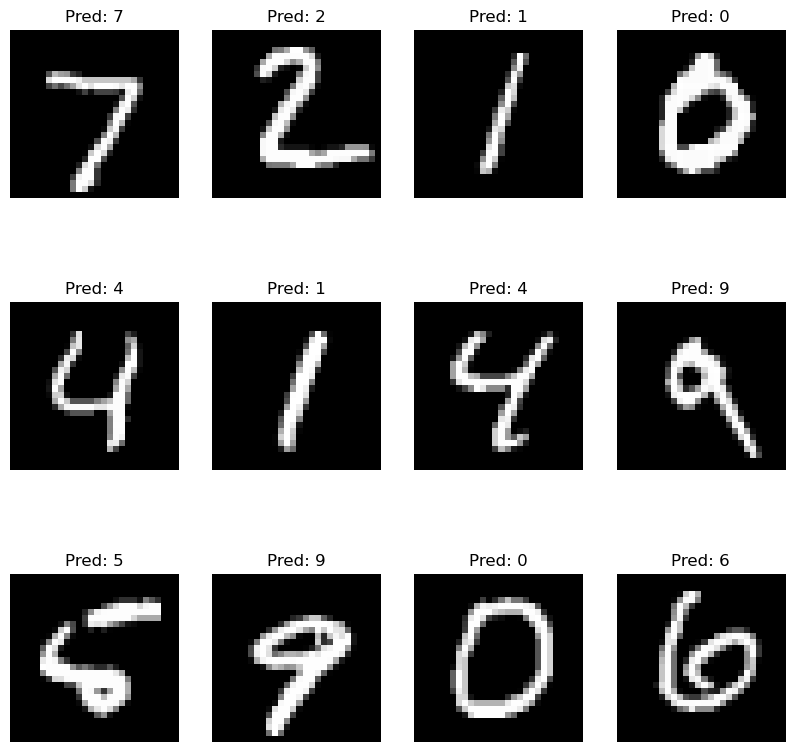

In [43]:
# Displaying some images and their predictions
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {svm_y_pred_final[i]}')
    plt.axis('off')
plt.show()

# KNN

In [44]:
from sklearn.neighbors  import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(x_train_norm,y_train_norm)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn.predict(x_val_norm)

In [48]:
y_test_pred_knn = knn.predict(x_test_normalized)

In [49]:
ERROR=[]
for i in range(1,11):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train_norm,y_train_norm)
    knn_y_pred1=knn1.predict(x_val_norm)
    error=(y_val_norm != knn_y_pred1).sum()/len(y_test)*100
    ERROR.append(error)
print(ERROR)

[3.11, 4.31, 3.2800000000000002, 3.4099999999999997, 3.42, 3.53, 3.65, 3.7900000000000005, 3.92, 4.03]


<Axes: >

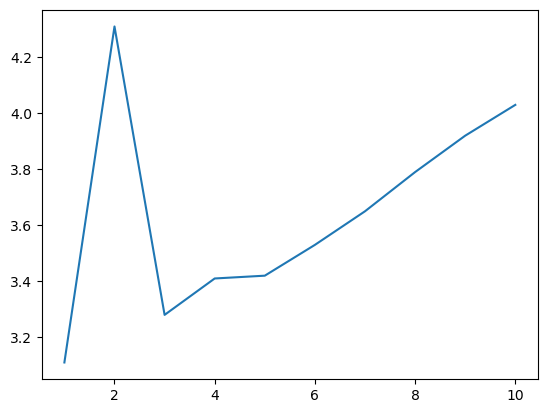

In [50]:
sns.lineplot(x=range(1,11),y=ERROR)

The elbow plot reveals that the error rate is minimized when k = 3, suggesting that using 3 neighbors gives the best model performance in terms of classification accuracy 

In [51]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train_norm,y_train_norm)

KNeighborsClassifier(n_neighbors=3)

###### predictions

In [52]:
knn_y_train = knn3.predict(x_train_norm)
knn_y_train

array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)

In [53]:
knn_y_val = knn3.predict(x_val_norm)
knn_y_val

array([7, 3, 8, ..., 9, 7, 2], dtype=uint8)

In [54]:
knn_y_test = knn3.predict(x_test_normalized)
knn_y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

##### Evaluation

In [55]:
accuracy_score(y_train_norm,knn_y_train)

0.9855416666666666

In [56]:
print(classification_report(y_train_norm,knn_y_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4748
           1       0.98      1.00      0.99      5420
           2       0.99      0.98      0.99      4784
           3       0.99      0.98      0.98      4912
           4       0.99      0.98      0.99      4666
           5       0.98      0.98      0.98      4317
           6       0.99      0.99      0.99      4741
           7       0.98      0.99      0.98      4966
           8       1.00      0.96      0.98      4691
           9       0.98      0.98      0.98      4755

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000



In [57]:
accuracy_score(y_val_norm,knn_y_val)

0.9726666666666667

In [58]:
print(classification_report(y_val_norm,knn_y_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [59]:
knn_acc = accuracy_score(y_test,knn_y_test)
knn_acc

0.9681

In [60]:
print(classification_report(y_test,knn_y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.93      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [61]:
pd.crosstab(y_test,knn_y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,1,1,0,0,0,1,1,1,0
1,0,1132,2,1,0,0,0,0,0,0
2,10,10,992,2,0,0,0,14,4,0
3,0,2,3,975,1,14,1,7,4,3
4,1,7,0,0,948,0,4,3,0,19
5,3,1,0,10,2,862,5,1,3,5
6,5,3,0,0,4,3,943,0,0,0
7,0,21,4,0,2,1,0,988,0,12
8,10,3,5,18,7,16,4,5,901,5


# Hyperparameter tuning

In [62]:
param_dist_knn = {'n_neighbors' : [3,5,7],
                 'weights' : ['uniform','distance'],
                 'metric' : ['euclidean','manhattan']}

In [63]:
random_search_knn = RandomizedSearchCV(knn3,param_dist_knn,n_iter = 5,cv= 3, verbose = 3, n_jobs = -1, random_state = 42)

In [64]:
random_search_knn.fit(x_train_norm,y_train_norm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=3)

In [65]:
random_search_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}

In [66]:
knn_best = KNeighborsClassifier(weights= 'uniform',
 n_neighbors = 3,
 metric = 'euclidean')

In [67]:
knn_best.fit(x_train_norm,y_train_norm)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [68]:
knn_y_pred_final = knn3.predict(x_test_normalized)

In [69]:
knn_acc_test= accuracy_score(y_test,knn_y_pred_final)
knn_acc_test

0.9681

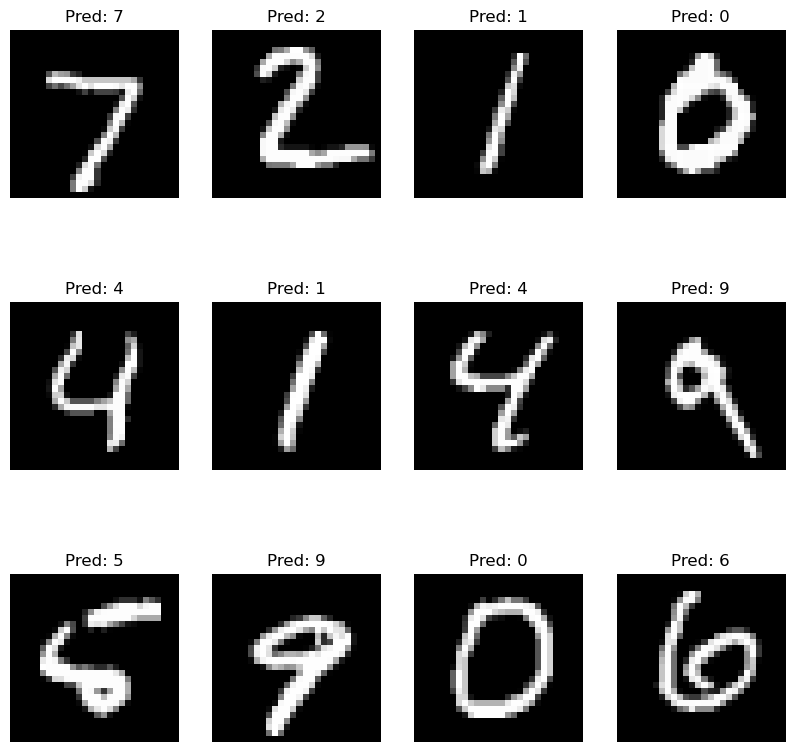

In [70]:
# Displaying some images and their predictions
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {knn_y_pred_final[i]}')
    plt.axis('off')
plt.show()

# ANN

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
ann = MLPClassifier(hidden_layer_sizes=(12,8),activation = 'relu', solver = 'adam', max_iter = 10)

In [73]:
ann.fit(x_train_norm,y_train_norm)

MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=10)

###### predictions

In [74]:
ann_y_train = ann.predict(x_train_norm)
ann_y_train

array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)

In [75]:
ann_y_val = ann.predict(x_val_norm)
ann_y_val

array([7, 3, 8, ..., 4, 7, 2], dtype=uint8)

In [76]:
ann_y_test = ann.predict(x_test_normalized)
ann_y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

###### evaluation

In [77]:
accuracy_score(y_train_norm,ann_y_train)

0.9312916666666666

In [78]:
print(classification_report(y_train_norm,ann_y_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4748
           1       0.97      0.98      0.97      5420
           2       0.94      0.93      0.94      4784
           3       0.91      0.89      0.90      4912
           4       0.95      0.92      0.94      4666
           5       0.89      0.90      0.90      4317
           6       0.96      0.96      0.96      4741
           7       0.93      0.94      0.94      4966
           8       0.90      0.91      0.91      4691
           9       0.89      0.91      0.90      4755

    accuracy                           0.93     48000
   macro avg       0.93      0.93      0.93     48000
weighted avg       0.93      0.93      0.93     48000



In [79]:
accuracy_score(y_val_norm,ann_y_val)

0.9213333333333333

In [80]:
print(classification_report(y_val_norm,ann_y_val))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.93      0.91      0.92      1174
           3       0.89      0.87      0.88      1219
           4       0.94      0.93      0.94      1176
           5       0.89      0.89      0.89      1104
           6       0.96      0.95      0.96      1177
           7       0.92      0.92      0.92      1299
           8       0.89      0.89      0.89      1160
           9       0.88      0.90      0.89      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [81]:
ann_acc = accuracy_score(y_test,ann_y_test)
ann_acc

0.9245

In [82]:
print(classification_report(y_test,ann_y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.89      0.90      1010
           4       0.94      0.92      0.93       982
           5       0.88      0.87      0.87       892
           6       0.95      0.94      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.89      0.91      0.90       974
           9       0.89      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [83]:
pd.crosstab(y_test,ann_y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,955,0,4,1,0,10,4,3,3,0
1,0,1113,2,2,0,2,4,0,12,0
2,20,2,943,14,5,0,10,8,20,10
3,1,2,21,898,2,41,0,19,23,3
4,1,1,12,0,904,0,5,1,5,53
5,8,1,1,43,9,776,11,10,29,4
6,10,3,5,0,14,20,902,1,3,0
7,3,7,14,13,8,1,0,943,4,35
8,3,6,6,17,7,26,9,7,889,4


### Hyperparameter tuning in ann

ANN don't have direct hyperparameter tuning like traditional algorithms. 

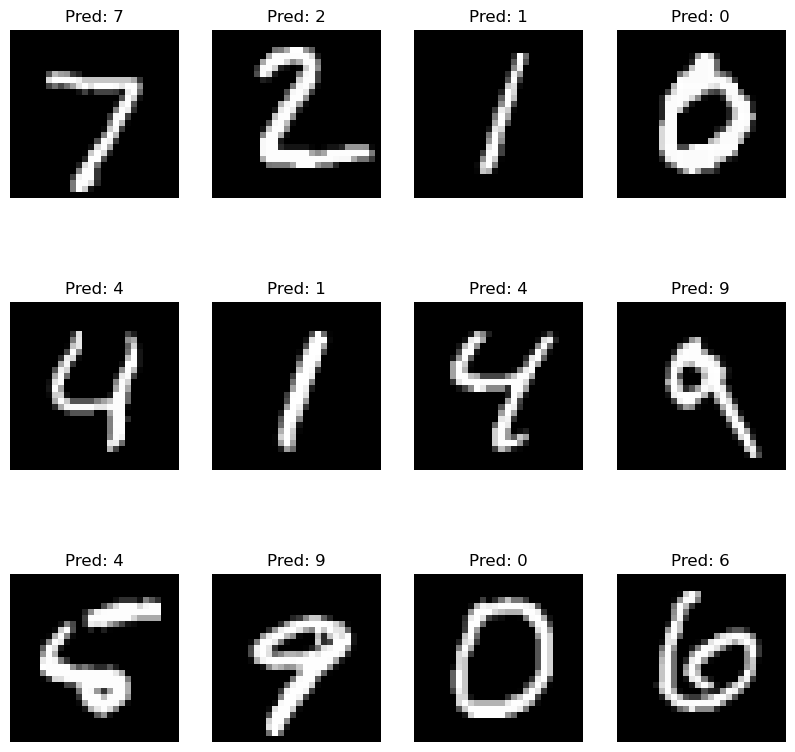

In [84]:
# Displaying some images and their predictions
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {ann_y_test[i]}')
    plt.axis('off')
plt.show()

# CNN

In [85]:
cnn = Sequential()

In [86]:
#first convolutional layer

In [87]:
cnn.add(Conv2D(filters=16, kernel_size = 3,padding ='same',activation = 'relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=2))

In [88]:
#second convolutional layer

In [89]:
cnn.add(Conv2D(filters=32, kernel_size = 3,padding ='same',activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=2))

In [90]:
#third convolutional layer

In [91]:
cnn.add(Conv2D(filters=64, kernel_size = 3,padding ='same',activation = 'relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=2))

In [92]:
cnn.add(Dropout(0.3))

- This avoids overfitting by dropping 30% info

In [93]:
cnn.add(Flatten())

In [94]:
cnn.add(Dense(500,activation = 'relu'))

In [95]:
cnn.add(Dropout(0.3))

In [96]:
cnn.add(Dense(10,activation = 'softmax'))    #output layer

In [97]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 316,806 (1.21 MB)

 Trainable params: 316,806 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [99]:
cnn.fit(x_train_cnn,y_train_cnn,batch_size = 32, epochs = 5,validation_data = (x_val_cnn,y_val_cnn))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8514 - loss: 0.4439 - val_accuracy: 0.9805 - val_loss: 0.0659
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9888 - val_loss: 0.0374
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9835 - loss: 0.0516 - val_accuracy: 0.9889 - val_loss: 0.0373
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9903 - val_loss: 0.0316
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9867 - val_loss: 0.0457


###### predicting probablities

In [100]:
cnn_y_train_probs = cnn.predict(x_train_cnn)
cnn_y_train_probs

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


array([[6.24165772e-14, 1.35859978e-13, 4.41644805e-16, ...,
        1.47485095e-12, 5.29470134e-10, 6.84329180e-08],
       [9.99926329e-01, 3.61330771e-10, 1.41162344e-08, ...,
        3.30332085e-07, 2.45418505e-07, 3.96009709e-05],
       [1.15788112e-07, 9.99999285e-01, 3.35095258e-08, ...,
        2.07033864e-07, 3.46206797e-08, 6.35870023e-08],
       ...,
       [9.99994040e-01, 2.97212088e-10, 1.31312134e-08, ...,
        1.58751696e-08, 1.64082886e-10, 5.98680617e-06],
       [9.98858333e-01, 3.58823002e-07, 1.07084855e-03, ...,
        5.94250196e-06, 3.15317152e-06, 5.86075075e-05],
       [4.41713269e-07, 2.13711664e-05, 9.71334316e-07, ...,
        4.83989652e-06, 7.57472094e-07, 4.10381588e-04]], dtype=float32)

In [101]:
cnn_y_val_probs= cnn.predict(x_val_cnn)
cnn_y_val_probs

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[7.9327753e-15, 5.9896497e-12, 1.0334156e-11, ..., 1.0000000e+00,
        7.9508055e-14, 1.4144571e-09],
       [7.0392817e-11, 6.7563775e-07, 1.3179487e-06, ..., 5.2566807e-05,
        3.7260964e-08, 2.5435747e-05],
       [6.3935532e-09, 2.5286118e-09, 3.0686685e-08, ..., 1.0324528e-09,
        9.9999392e-01, 2.5295233e-07],
       ...,
       [2.1096029e-09, 4.0260442e-08, 1.8952138e-09, ..., 4.2045795e-05,
        4.5552632e-08, 9.6544212e-01],
       [1.7929482e-07, 1.0218322e-08, 1.5024357e-08, ..., 9.9999475e-01,
        1.2683230e-09, 4.9368327e-06],
       [6.3188068e-08, 1.6945042e-06, 9.9996567e-01, ..., 2.9253559e-05,
        1.7278973e-08, 1.6156012e-07]], dtype=float32)

In [102]:
cnn_y_test_probs = cnn.predict(x_test_cnn)
cnn_y_test_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[6.9708146e-12, 1.0981510e-08, 1.1690580e-08, ..., 1.0000000e+00,
        7.7984884e-12, 1.9764022e-08],
       [1.5653892e-07, 2.0050769e-07, 9.9999964e-01, ..., 3.0986040e-09,
        9.3607810e-10, 4.1055923e-10],
       [2.4618409e-08, 9.9999833e-01, 1.0686079e-08, ..., 6.8954063e-07,
        4.0094378e-08, 6.3628306e-08],
       ...,
       [2.8455528e-15, 3.7403822e-10, 2.4063108e-13, ..., 1.9631601e-10,
        1.4560807e-10, 5.6896765e-11],
       [1.8046932e-09, 6.7948780e-10, 4.5793241e-11, ..., 1.6764575e-09,
        3.2128794e-06, 1.2902530e-07],
       [7.6717424e-07, 5.2558696e-10, 7.2165429e-09, ..., 6.7430575e-11,
        4.1209424e-07, 5.6659184e-09]], dtype=float32)

#### converting probabilities to class labels(0-9) by taking the index of the max value

In [103]:
cnn_y_train_preds = np.argmax(cnn_y_train_probs,axis = 1)
cnn_y_train_preds

array([5, 0, 1, ..., 0, 0, 4], dtype=int64)

In [104]:
cnn_y_val_preds = np.argmax(cnn_y_val_probs,axis = 1)
cnn_y_val_preds

array([7, 3, 8, ..., 9, 7, 2], dtype=int64)

In [105]:
cnn_y_test_preds = np.argmax(cnn_y_test_probs,axis = 1)
cnn_y_test_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

###### Evaluation

In [106]:
accuracy_score(y_train_cnn,cnn_y_train_preds)

0.9922916666666667

In [107]:
print(classification_report(y_train_cnn,cnn_y_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4748
           1       0.99      1.00      0.99      5420
           2       1.00      0.99      1.00      4784
           3       1.00      0.98      0.99      4912
           4       0.99      1.00      0.99      4666
           5       0.99      1.00      0.99      4317
           6       0.99      1.00      0.99      4741
           7       0.98      1.00      0.99      4966
           8       1.00      0.98      0.99      4691
           9       0.99      0.98      0.99      4755

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000



In [108]:
accuracy_score(y_val_cnn,cnn_y_val_preds)

0.9866666666666667

In [109]:
print(classification_report(y_val_cnn,cnn_y_val_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1175
           1       0.99      1.00      0.99      1322
           2       0.99      0.99      0.99      1174
           3       1.00      0.97      0.98      1219
           4       0.98      1.00      0.99      1176
           5       0.99      0.98      0.99      1104
           6       0.98      1.00      0.99      1177
           7       0.97      0.99      0.98      1299
           8       0.99      0.97      0.98      1160
           9       0.99      0.97      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [110]:
cnn_acc = accuracy_score(y_test,cnn_y_test_preds)
cnn_acc

0.9881

In [111]:
print(classification_report(y_test,cnn_y_test_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.97      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [112]:
pd.crosstab(y_test,cnn_y_test_preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1134,0,0,0,0,0,1,0,0
2,1,6,1017,0,2,0,0,6,0,0
3,1,0,6,984,0,9,0,10,0,0
4,0,0,0,0,980,0,0,0,0,2
5,1,0,0,2,0,885,1,1,0,2
6,1,5,0,0,3,2,946,0,1,0
7,0,4,1,0,0,0,0,1022,0,1
8,3,1,2,1,3,2,4,2,951,5


##### Hyperparameter tuning

- CNN don't have direct hyperparameter tuning like traditional algorithms.

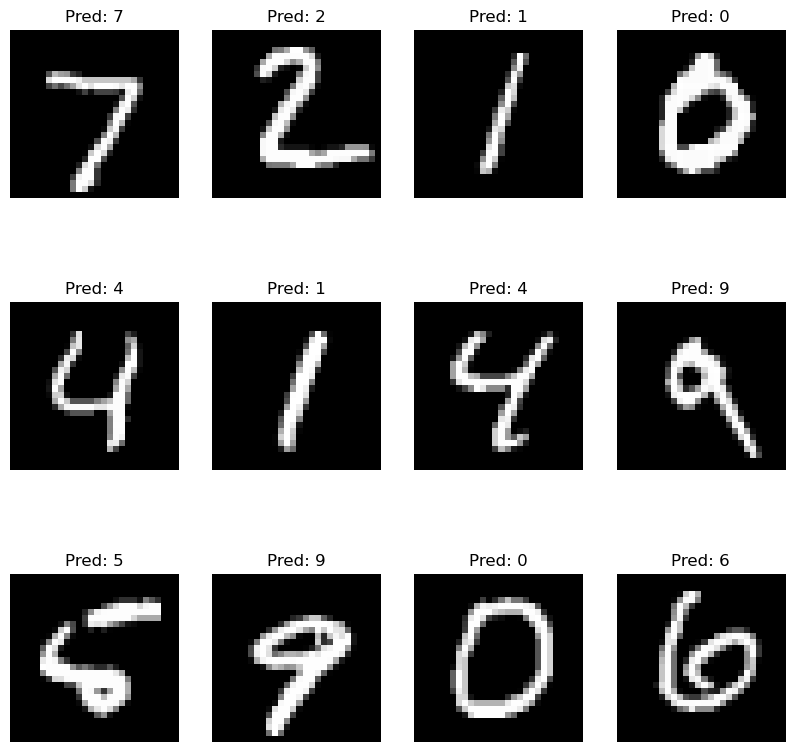

In [113]:
# Displaying some images and their predictions
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {cnn_y_test_preds[i]}')
    plt.axis('off')
plt.show()

# PROJECT CONCLUSION

###### Objective :

The goal of this project was to build and evaluate different machine learning models to classify handwritten digits from the MNIST dataset, which contains images of digits from 0 to 9. The models evaluated include Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN), and Convolutional Neural Networks (CNN). The performance of these models was assessed based on accuracy

###### Model Implementations

### 1. Support Vector Machine (SVM) :

- SVM  with a linear kernel was applied to the flattened and normalized images

- Hyperparameter tuning was performed using RandomizedSeachCV

- ACCURACY : 0.9777

- Insight : SVM performed well on the dataset, achieving a high accuracy of nearly 98%. This indicates SVM's robustness in dealing with image classification tasks even with flattened data.

### 2. K-Nearest Neighbors (KNN) :

- The KNN algorithm was applied with various values of k, and the optimal number of neighbors was determined using an elbow plot.

- ACCURACY : 0.9681

- Insight: KNN achieved a respectable accuracy but slightly lagged behind SVM and CNN. The simplicity of the algorithm limits its performance on larger datasets like MNIST.

### 3. Artificial Neural Network (ANN) :

- A feedforward neural network was implemented using one hidden layer and various activation functions.

- ACCURACY : 0.9245

- Insight: While ANN performed reasonably well, it did not achieve as high accuracy as CNN, reflecting the advantage of CNNs in image-based tasks where local patterns are crucial.

### 4. Convolutional Neural Network (CNN) :

-  CNN with multiple convolutional and pooling layers was implemented. This model effectively captured spatial hierarchies in the data.

- ACCURACY : 0.9881

- Insight: CNN outperformed all other models, achieving the highest accuracy of 98.81%. This shows the power of convolutional layers in handling image data, as they can capture both low-level and high-level features.

## Accuracy Comparision :

- A bar chart comparing the accuracy scores of SVM, KNN, ANN, and CNN was created to visualize model performance.

In [130]:
Final_Result =pd.DataFrame({'MODEL': ['SVM','KNN','ANN','CNN'],'ACCURACY' : [svm_acc_test,knn_acc_test,ann_acc,cnn_acc]})
Final_Result

,MODEL,ACCURACY
0,SVM,0.9777
1,KNN,0.9681
2,ANN,0.9245
3,CNN,0.9881


In [131]:
from tabulate import tabulate

In [132]:
print("MODEL COMPARISIONS:")
print(tabulate(Final_Result,headers ='keys',tablefmt= 'grid',showindex = False))

MODEL COMPARISIONS:
+---------+------------+
| MODEL   |   ACCURACY |
+=========+============+
| SVM     |     0.9777 |
+---------+------------+
| KNN     |     0.9681 |
+---------+------------+
| ANN     |     0.9245 |
+---------+------------+
| CNN     |     0.9881 |
+---------+------------+


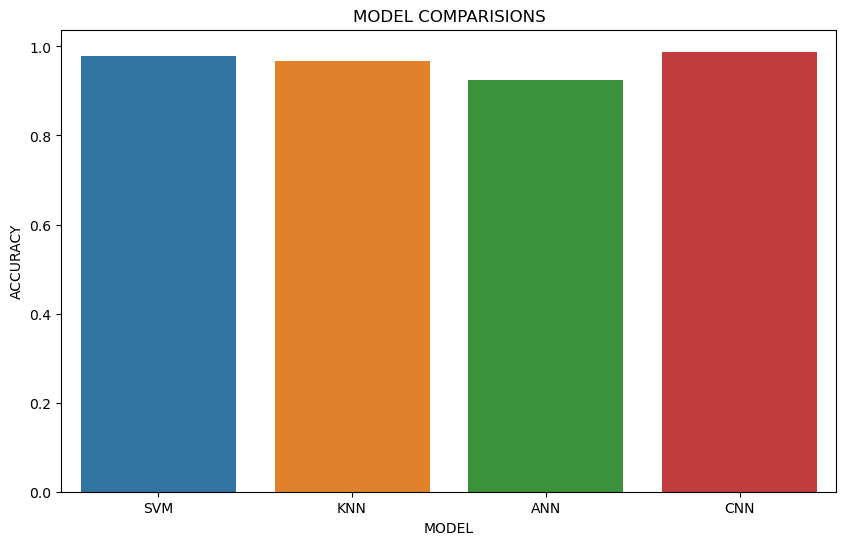

In [134]:
plt.figure(figsize =(10,6))
sns.barplot(data = Final_Result,x = 'MODEL', y = 'ACCURACY')
plt.title('MODEL COMPARISIONS')
plt.show()



### CONCLUSION : 

######  Best Model :

- The CNN model achieved the highest accuracy (0.9881) and demonstrated its superiority for image classification tasks. CNN's ability to capture local patterns and features makes it ideal for the MNIST dataset.

######  Strong Performance  :

- SVM also performed well, with an accuracy of 0.9777, closely following CNN. KNN, although simple, achieved a decent accuracy of 0.9681, while ANN, with 0.9245, was effective but less robust than CNN.

###### Key Insights :

- CNN's dominance reaffirms that for image-related tasks, models like CNN that can handle spatial hierarchies are more suitable than simpler methods like KNN or even SVM.